In [1089]:
import pickle
import os
from nltk import everygrams, ngrams, word_tokenize, FreqDist

#modelpath = os.path.join(os.path.dirname(os.path.dirname(__file__)), 'models/randomforest.pkl')
#vectpath = os.path.join(os.path.dirname(os.path.dirname(__file__)), 'models/tfid_vectorizer.pkl')
modelpath = os.path.dirname('../models/randomforest.pkl')
vectpath = os.path.dirname('../models/tfid_vectorizer.pkl')

In [1090]:
#trained_model = pickle.load(open(modelpath, 'rb'))
#vectorizer = pickle.load(open(vectpath, 'rb'))

In [1091]:
import matplotlib.pyplot as plt
import re
import pandas as pd

In [1092]:
class isitkbs(object):
    
    def __init__(self, model = 'randomforest'):
        self.model = model
    #Especifica qual modelo deve ser utilizado
    #Por padrão, usa-se o randomForest
    
    #Função para determinar se uma palavra é keyboardsmashing
    #A entrada deve ser uma palavra
    def is_word_kbs(self, input_data):
        #input_data = self.input_data
        
        with open(f'../models/{self.model}.pkl', 'rb') as f:
            trained_model = pickle.load(f)
    
        with open('../models/tfid_vectorizer.pkl', 'rb') as r:
            vectorizer = pickle.load(r)
        
        if (len(input_data) == 1):
            return 0
        input_data = [input_data]
        input_ngrams = []

        for i in range(len(input_data)):
            ngram = map(''.join, list(everygrams(input_data[i], 2, 4)))
            input_ngrams.extend(ngram)

        predprob = trained_model.predict_proba(
            vectorizer.transform(input_ngrams))[:, 1]
            
        prob = sum(predprob)/len(input_ngrams)
        if (prob >= 0.5):
            return 1
        else:
            return 0
    
    #Função para determinar quais são os keyboard smashing em uma frase 
    #A entrada deve ser uma string ou uma lista de palavras    
    def is_sent_kbs(self, input_data):
        if(type(input_data) == list):
            input_data = ' '.join(input_data)
        
        mashs = []
        
        """ if (len(input_data) == 1):
            return mashs """
        
        words = input_data.split()
        
        for word in words:
            res = self.is_word_kbs(word)
            if res == 1:
                mashs.append(word)
        
        return mashs
    
    #Função que mostra a frequência de caracteres em keyboard smashing
    #A entrada deve ser uma string ou uma lista de string
    def freqkbs(self, input_data, graph = 0):
        
        cont_char = {}
        
        data = self.is_sent_kbs(input_data)
        data = ' '.join(data)
        
        if(len(data) != 0):
            data = re.sub(r'[^\w\s]','',data)
            sing_char = set(data)
            
            for i in sing_char:
                cont_char[i] = data.count(i)
            
            cont_char = dict(sorted(cont_char.items()))
            
            #Plota gráfico se graph = 1 na chamda da função
            if(graph==1):
                self.__freqgraph(cont_char)
            
            try:
                del cont_char[' ']
            except:
                return cont_char
        
        return cont_char
    
    def __freqgraph(self, cont_char):
        #Determina eixo x e eixo y
        x_axis = list(cont_char.keys())
        y_axis = list(cont_char.values())
        
        #Nomeia os eixos
        plt.xlabel('Caracteres')
        plt.ylabel('Frequência')
        
        #Plota o gráfico
        plt.bar(x_axis, y_axis)
        
    def replace_kbs(self, input_data,value = None,inplace=False):
        """ 
        Parâmetros:
        dataframe: dataframe pandas do qual os keyboard smashing vão ser substituidos.
        value: string que vai substituir os keyboard smashings, caso seja uma string vazia as linhas que apresentarem kbs serão removidas do dataframe
        inplace: se as substituições serão feitas no próprio dataframe dos parâmetros (True) ou será retornada uma cópia do df (False)
        """ 
        if value == None:
                value = "itskbs"
        
        """ 
        Se o tipo de entrada for um dataframe pandas, a função __dataframe é chamada para fazer o tratamento
        """
        if type(input_data) == pd.DataFrame:
            #df = input_data.copy()
            df = input_data
            if inplace == True:
                df = input_data.copy(deep=False)
            
            return self.__dataframe(df, value)
        
        """ 
        Se o tipo de entrada for uma lista ou uma string de palavras, a função __listOrString é chamada
        """
        if (type(input_data) == str or type(input_data) == list):
              
            return self.__listOrString(input_data, value)
        
    def __dataframe(self,df, value):
        wordskbs = []
        nRow = df.shape[0]
        nCol = df.shape[1]
        for row in range(nRow):
            for col in range(nCol):
                wordskbs = self.is_sent_kbs(df.iloc[row, col])
                if(len(wordskbs)!=0):
                    df.iloc[row, col] = value
                if(df.iloc[row, col] == "itskbs"):
                    df = df.drop(row)
        return df
    
    def __listOrString(self, input_data, value):
        isList = True
        if (type(input_data) != list):
            isList = False
            input_data = input_data.split()
        
        wordskbs = self.is_sent_kbs(input_data)
        
        end = len(input_data) - 1
        for i in range(0,end,1):
            if(input_data[i] in wordskbs):
                if(value != 'itskbs'):
                    input_data[i] = value
                else:
                    del input_data[i]
                    end-=end
        
        if(isList == False):
            input_data = ' '.join(input_data)
            
        return input_data
            

In [1093]:
#Inicia objeto
# teste = isitkbs(model="randomforest")
teste = isitkbs(model="naivebayes")

In [1094]:
teste.is_word_kbs('ahduawfs')

1

In [1095]:
teste.is_sent_kbs('aspdo asocjn')

['aspdo', 'asocjn']

{'a': 2, 'b': 3, 's': 1, 't': 2, 'w': 1}

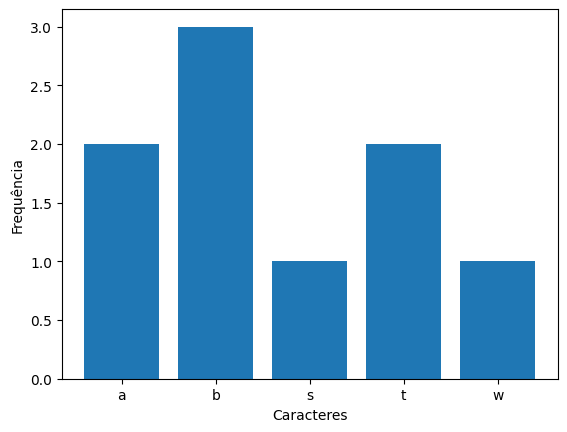

In [1096]:
teste.freqkbs('This is awruhvbbara tawbbbast teste', graph=1)

In [1097]:
palavras = {"data":["Douglas", "test", "oixcjoa", "thought", "interesting", "kjadlsjda", "world", "aaaaaaa", "vessel"], "data2":["none", "name", "aklksda", "zzzzzz","exception", "optional", "bottle", "piooijoj", "mnfjisdh"]}
df = pd.DataFrame(palavras)
df.head(10)

,data,data2
0,Douglas,none
1,test,name
2,oixcjoa,aklksda
3,thought,zzzzzz
4,interesting,exception
5,kjadlsjda,optional
6,world,bottle
7,aaaaaaa,piooijoj
8,vessel,mnfjisdh


In [1102]:
texto = teste.replace_kbs('I am qweeqrsdaa friend', 'your')

print(texto)

I am your friend


In [1107]:
teste.replace_kbs('I am wwirjjaa friend')

'I am friend'